In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10

pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)

In [2]:
df = pd.read_csv("uk_econcomic.csv")

6.	Merchandise imports and exports of UK. Have an eye on the y-axis. Imports for agriculture, food and fuel are more than exports. Manufacturing and ores exports are more than imports.
7.	Commercial service: Insurance and Computer import is higher than exports but travel and transport services import is higher than exports. Both 5 and 6 means that poor and people not living in urban area were more hit.


In [3]:
(df.columns)

Index(['Unnamed: 0', 'Year', 'GDP (current US$)', 'GDP per capita (current US$)', 'GDP growth (annual %)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)', 'Consumer price index (2010 = 100)', 'Tax revenue (% of GDP)', 'Rural population',
       'Rural population (% of total population)', 'Rural population growth (annual %)', 'Urban population', 'Urban population (% of total)',
       'Urban population growth (annual %)', 'Employment to population ratio, 15+, female (%) (national estimate)',
       'Employment to population ratio, 15+, male (%) (national estimate)', 'Employment to population ratio, 15+, total (%) (national estimate)',
       'Employment to population ratio, ages 15-24, female (%) (national estimate)', 'Employment to population ratio, ages 15-24, male (%) (national estimate)',
       'Employment to population ratio, ages 15-24, total (%) (national estimate)', 'Ratio of female to male labor force participation rate (%) (national estimate)'

In [4]:
dfmr = df[['Year','Agricultural raw materials exports (% of merchandise exports)', 'Agricultural raw materials imports (% of merchandise imports)',
       'Food exports (% of merchandise exports)', 'Food imports (% of merchandise imports)', 'Fuel exports (% of merchandise exports)',
       'Fuel imports (% of merchandise imports)', 'Ores and metals exports (% of merchandise exports)', 'Ores and metals imports (% of merchandise imports)',
       'Manufactures exports (% of merchandise exports)', 'Manufactures imports (% of merchandise imports)']]
dfmr.columns = ['Year','Agricultural exports', 'Agricultural imports',
       'Food exports', 'Food imports', 'Fuel exports',
       'Fuel imports', 'Ores and metals exports', 'Ores and metals imports',
       'Manufactures exports', 'Manufactures imports']

In [5]:
dfmr_noMan = df[['Year','Agricultural raw materials exports (% of merchandise exports)', 'Agricultural raw materials imports (% of merchandise imports)',
       'Food exports (% of merchandise exports)', 'Food imports (% of merchandise imports)', 'Fuel exports (% of merchandise exports)',
       'Fuel imports (% of merchandise imports)', 'Ores and metals exports (% of merchandise exports)', 'Ores and metals imports (% of merchandise imports)']]
dfmr_noMan.columns = ['Year','Agricultural exports', 'Agricultural imports',
       'Food exports', 'Food imports', 'Fuel exports',
       'Fuel imports', 'Ores and metals exports', 'Ores and metals imports']

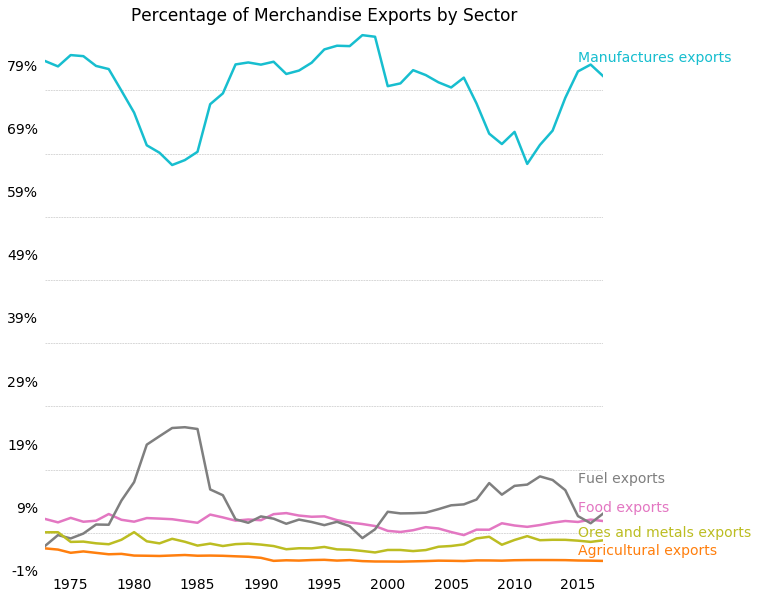

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data into a pandas DataFrame.  
gender_degree_data = dfmr

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(255, 127, 14), (227, 119, 194),  (127, 127, 127),   
             (188, 189, 34),  (23, 190, 207),(31, 119, 180),  (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare  
# exception because of the number of lines being plotted on it.  
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(10, 10))  

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

# # Limit the range of the plot to only where the data is.  
# # Avoid unnecessary whitespace.  
plt.ylim(-1, 85)  
plt.xlim(1973, 2017)  

# # Make sure your axis ticks are large enough to be easily read.  
# # You don't want your viewers squinting to read your plot.  
plt.yticks(range(-1, 85, 10), [str(x) + "%" for x in range(-1, 85, 10)], fontsize=14)  
plt.xticks(fontsize=14)  

# # Provide tick lines across the plot to help your viewers trace along  
# # the axis ticks. Make sure that the lines are light and small so they  
# # don't obscure the primary data lines.  
for y in range(5, 85, 10):  
    plt.plot(range(1973, 2019), [y] * len(range(1973, 2019)), "--", lw=0.5, color="black", alpha=0.3)  

# # Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on")  

# Now that the plot is prepared, it's time to actually plot the data!  
# Note that I plotted the majors in order of the highest % in the final year.  
majors = ['Agricultural exports',
       'Food exports', 'Fuel exports',
        'Ores and metals exports', 
       'Manufactures exports']  

for rank, column in enumerate(majors):  
    # Plot each line separately with its own color, using the Tableau 20  
    # color set in order.  
    plt.plot(gender_degree_data.Year.values,  
            gender_degree_data[column.replace("\n", " ")].values,  
            lw=2.5, color=tableau20[rank])  

    # Add a text label to the right end of every line. Most of the code below  
    # is adding specific offsets y position because some labels overlapped.  
    y_pos = gender_degree_data[column.replace("\n", " ")].values[-1] - 0.5  
    if column == "Agricultural exports":  
        y_pos += 1.5  
#     elif column == "Agricultural imports":  
#         y_pos -= 0.5  
    elif column == "Food exports":  
        y_pos += 1.90  
#     elif column == "Food imports":  
#         y_pos -= 0.25  
    elif column == "Fuel exports":  
        y_pos += 5.25  
#     elif column == "Fuel imports":  
#         y_pos += 0.25  
    elif column == "Ores and metals exports":  
        y_pos += 1.0  
#     elif column == "Ores and metals imports":  
#         y_pos += 0.75  
    elif column == "Manufactures exports":  
        y_pos += 2.75  
#     elif column == "Manufactures imports":  
#         y_pos += 0.75  
#     elif column == "Engineering":  
#         y_pos -= 0.25  

    # Again, make sure that all labels are large enough to be easily read  
    # by the viewer.  
    plt.text(2015, y_pos, column, fontsize=14, color=tableau20[rank])  

# matplotlib's title() call centers the title on the plot, but not the graph,  
# so I used the text() call to customize where the title goes.  

# Make the title big enough so it spans the entire plot, but don't make it  
# so big that it requires two lines to show.  

# Note that if the title is descriptive enough, it is unnecessary to include  
# axis labels; they are self-evident, in this plot's case.  
plt.title("Percentage of Merchandise Exports"  
       " by Sector", fontsize=17, ha="center")  

# Always include your data source(s) and copyright notice! And for your  
# data sources, tell your viewers exactly where the data came from,  
# preferably with a direct link to the data. Just telling your viewers  
# that you used data from the "U.S. Census Bureau" is completely useless:  
# the U.S. Census Bureau provides all kinds of data, so how are your  
# viewers supposed to know which data set you used?  
# plt.text(1976, -8, "Data source: https://datacatalog.worldbank.org/dataset/world-development-indicators"  
#         "\nAuthor: Piush Vaish",fontsize=10)  

# Finally, save the figure as a PNG.  
# You can also save it as a PDF, JPEG, etc.  
# Just change the file extension in this call.  
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.  
plt.savefig("percent-merchandise-exports.png", bbox_inches="tight")


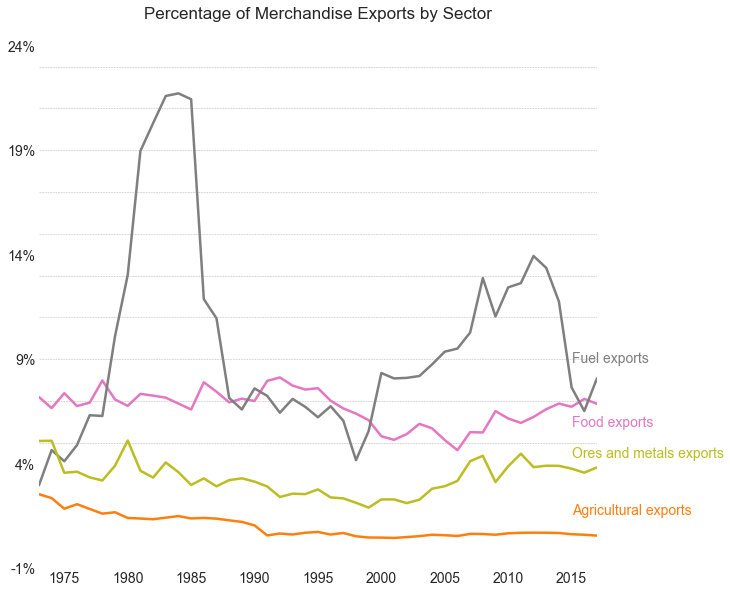

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.style as style
style.use('seaborn-white')

# Read the data into a pandas DataFrame.  
gender_degree_data = dfmr_noMan

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(255, 127, 14), (227, 119, 194),  (127, 127, 127),   
             (188, 189, 34),  (23, 190, 207),(31, 119, 180),  (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare  
# exception because of the number of lines being plotted on it.  
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(10, 10))  

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

# # Limit the range of the plot to only where the data is.  
# # Avoid unnecessary whitespace.  
plt.ylim(-1, 25)  
plt.xlim(1973, 2017)  

# # Make sure your axis ticks are large enough to be easily read.  
# # You don't want your viewers squinting to read your plot.  
plt.yticks(range(-1, 25, 5), [str(x) + "%" for x in range(-1, 25, 5)], fontsize=14)  
plt.xticks(fontsize=14)  

# # Provide tick lines across the plot to help your viewers trace along  
# # the axis ticks. Make sure that the lines are light and small so they  
# # don't obscure the primary data lines.  
for y in range(5, 25, 2):  
    plt.plot(range(1973, 2019), [y] * len(range(1973, 2019)), "--", lw=0.5, color="black", alpha=0.3)  

# # Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on")  

# Now that the plot is prepared, it's time to actually plot the data!  
# Note that I plotted the majors in order of the highest % in the final year.  
majors = ['Agricultural exports',
       'Food exports', 'Fuel exports',
        'Ores and metals exports']  

for rank, column in enumerate(majors):  
    # Plot each line separately with its own color, using the Tableau 20  
    # color set in order.  
    plt.plot(gender_degree_data.Year.values,  
            gender_degree_data[column.replace("\n", " ")].values,  
            lw=2.5, color=tableau20[rank])  

    # Add a text label to the right end of every line. Most of the code below  
    # is adding specific offsets y position because some labels overlapped.  
    y_pos = gender_degree_data[column.replace("\n", " ")].values[-1] - 0.5  
    if column == "Agricultural exports":  
        y_pos += 1.5  
#     elif column == "Agricultural imports":  
#         y_pos -= 0.5  
    elif column == "Food exports":  
        y_pos -= .60  
#     elif column == "Food imports":  
#         y_pos -= 0.25  
    elif column == "Fuel exports":  
        y_pos += 1.25  
#     elif column == "Fuel imports":  
#         y_pos += 0.25  
    elif column == "Ores and metals exports":  
        y_pos += 1.0  
#     elif column == "Ores and metals imports":  
#         y_pos += 0.75  
#     elif column == "Manufactures exports":  
#         y_pos += 2.75  
#     elif column == "Manufactures imports":  
#         y_pos += 0.75  
#     elif column == "Engineering":  
#         y_pos -= 0.25  

    # Again, make sure that all labels are large enough to be easily read  
    # by the viewer.  
    plt.text(2015, y_pos, column, fontsize=14, color=tableau20[rank])  

# matplotlib's title() call centers the title on the plot, but not the graph,  
# so I used the text() call to customize where the title goes.  

# Make the title big enough so it spans the entire plot, but don't make it  
# so big that it requires two lines to show.  

# Note that if the title is descriptive enough, it is unnecessary to include  
# axis labels; they are self-evident, in this plot's case.  
plt.title("Percentage of Merchandise Exports"  
       " by Sector", fontsize=17, ha="center")  

# Always include your data source(s) and copyright notice! And for your  
# data sources, tell your viewers exactly where the data came from,  
# preferably with a direct link to the data. Just telling your viewers  
# that you used data from the "U.S. Census Bureau" is completely useless:  
# the U.S. Census Bureau provides all kinds of data, so how are your  
# viewers supposed to know which data set you used?  
# plt.text(1976, -8, "Data source: https://datacatalog.worldbank.org/dataset/world-development-indicators"  
#         "\nAuthor: Piush Vaish",fontsize=10)  

# Finally, save the figure as a PNG.  
# You can also save it as a PDF, JPEG, etc.  
# Just change the file extension in this call.  
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.  
plt.savefig("percent-merchandise-exports_noMan.png", bbox_inches="tight")


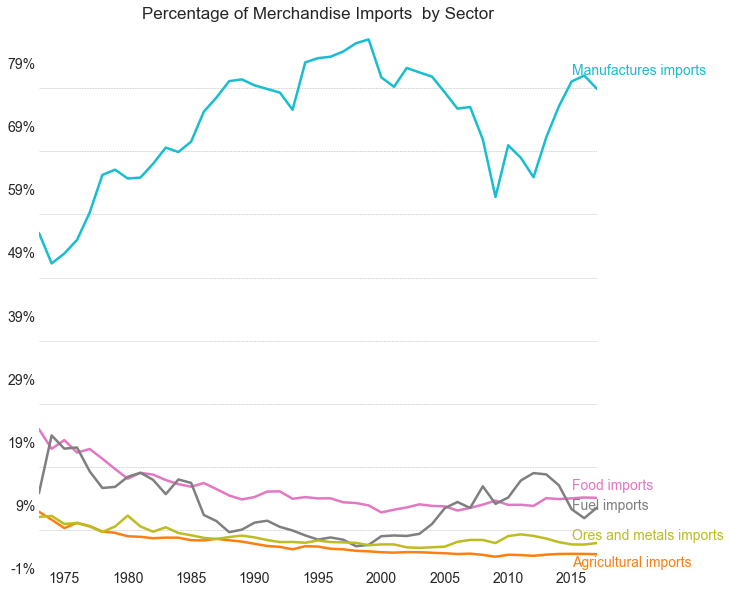

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data into a pandas DataFrame.  
gender_degree_data = dfmr

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(255, 127, 14), (227, 119, 194),  (127, 127, 127),   
             (188, 189, 34),  (23, 190, 207),(31, 119, 180),  (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare  
# exception because of the number of lines being plotted on it.  
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(10, 10))  

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

# # Limit the range of the plot to only where the data is.  
# # Avoid unnecessary whitespace.  
plt.ylim(-1, 85)  
plt.xlim(1973, 2017)  

# # Make sure your axis ticks are large enough to be easily read.  
# # You don't want your viewers squinting to read your plot.  
plt.yticks(range(-1, 85, 10), [str(x) + "%" for x in range(-1, 85, 10)], fontsize=14)  
plt.xticks(fontsize=14)  

# # Provide tick lines across the plot to help your viewers trace along  
# # the axis ticks. Make sure that the lines are light and small so they  
# # don't obscure the primary data lines.  
for y in range(5, 85, 10):  
    plt.plot(range(1973, 2019), [y] * len(range(1973, 2019)), "--", lw=0.5, color="black", alpha=0.3)  

# # Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on")  

# Now that the plot is prepared, it's time to actually plot the data!  
# Note that I plotted the majors in order of the highest % in the final year.  
majors = ['Agricultural imports',
       'Food imports', 'Fuel imports',
        'Ores and metals imports', 
       'Manufactures imports']  

for rank, column in enumerate(majors):  
    # Plot each line separately with its own color, using the Tableau 20  
    # color set in order.  
    plt.plot(gender_degree_data.Year.values,  
            gender_degree_data[column.replace("\n", " ")].values,  
            lw=2.5, color=tableau20[rank])  

    # Add a text label to the right end of every line. Most of the code below  
    # is adding specific offsets y position because some labels overlapped.  
    y_pos = gender_degree_data[column.replace("\n", " ")].values[-1] - 0.5  
    if column == "Agricultural imports":  
        y_pos -= 1.5  
#     elif column == "Agricultural imports":  
#         y_pos -= 0.5  
    elif column == "Food imports":  
        y_pos += 1.75  
#     elif column == "Food imports":  
#         y_pos -= 0.25  
    elif column == "Fuel imports":  
        y_pos += .25  
#     elif column == "Fuel imports":  
#         y_pos += 0.25  
    elif column == "Ores and metals imports":  
        y_pos += 1.0  
#     elif column == "Ores and metals imports":  
#         y_pos += 0.75  
    elif column == "Manufactures imports":  
        y_pos += 2.75  
#     elif column == "Manufactures imports":  
#         y_pos += 0.75  
#     elif column == "Engineering":  
#         y_pos -= 0.25  

    # Again, make sure that all labels are large enough to be easily read  
    # by the viewer.  
    plt.text(2015, y_pos, column, fontsize=14, color=tableau20[rank])  

# matplotlib's title() call centers the title on the plot, but not the graph,  
# so I used the text() call to customize where the title goes.  

# Make the title big enough so it spans the entire plot, but don't make it  
# so big that it requires two lines to show.  

# Note that if the title is descriptive enough, it is unnecessary to include  
# axis labels; they are self-evident, in this plot's case.  
plt.title("Percentage of Merchandise Imports "  
       " by Sector", fontsize=17, ha="center")  

# Always include your data source(s) and copyright notice! And for your  
# data sources, tell your viewers exactly where the data came from,  
# preferably with a direct link to the data. Just telling your viewers  
# that you used data from the "U.S. Census Bureau" is completely useless:  
# the U.S. Census Bureau provides all kinds of data, so how are your  
# viewers supposed to know which data set you used?  
# plt.text(1976, -8, "Data source: https://datacatalog.worldbank.org/dataset/world-development-indicators"  
#         "\nAuthor: Piush Vaish",fontsize=10)  

# Finally, save the figure as a PNG.  
# You can also save it as a PDF, JPEG, etc.  
# Just change the file extension in this call.  
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.  
plt.savefig("percent-merchandise-imports.png", bbox_inches="tight")


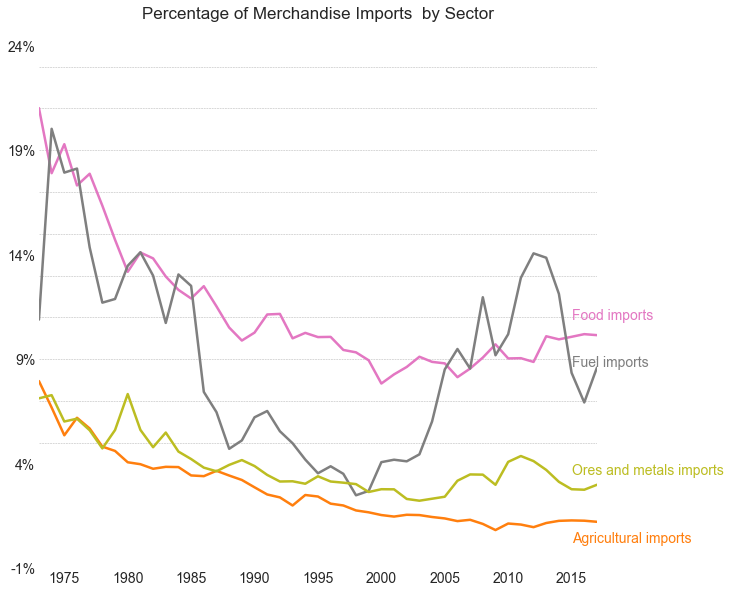

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data into a pandas DataFrame.  
gender_degree_data = dfmr_noMan

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(255, 127, 14), (227, 119, 194),  (127, 127, 127),   
             (188, 189, 34),  (23, 190, 207),(31, 119, 180),  (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare  
# exception because of the number of lines being plotted on it.  
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(10, 10))  

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

# # Limit the range of the plot to only where the data is.  
# # Avoid unnecessary whitespace.  
plt.ylim(-1, 25)  
plt.xlim(1973, 2017)  

# # Make sure your axis ticks are large enough to be easily read.  
# # You don't want your viewers squinting to read your plot.  
plt.yticks(range(-1, 25, 5), [str(x) + "%" for x in range(-1, 25, 5)], fontsize=14)  
plt.xticks(fontsize=14)  

# # Provide tick lines across the plot to help your viewers trace along  
# # the axis ticks. Make sure that the lines are light and small so they  
# # don't obscure the primary data lines.  
for y in range(5, 25, 2):  
    plt.plot(range(1973, 2019), [y] * len(range(1973, 2019)), "--", lw=0.5, color="black", alpha=0.3)  

# # Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on")  

# Now that the plot is prepared, it's time to actually plot the data!  
# Note that I plotted the majors in order of the highest % in the final year.  
majors = ['Agricultural imports',
       'Food imports', 'Fuel imports',
        'Ores and metals imports']  

for rank, column in enumerate(majors):  
    # Plot each line separately with its own color, using the Tableau 20  
    # color set in order.  
    plt.plot(gender_degree_data.Year.values,  
            gender_degree_data[column.replace("\n", " ")].values,  
            lw=2.5, color=tableau20[rank])  

    # Add a text label to the right end of every line. Most of the code below  
    # is adding specific offsets y position because some labels overlapped.  
    y_pos = gender_degree_data[column.replace("\n", " ")].values[-1] - 0.5  
    if column == "Agricultural imports":  
        y_pos -= .5  
#     elif column == "Agricultural imports":  
#         y_pos -= 0.5  
    elif column == "Food imports":  
        y_pos += 1.25  
#     elif column == "Food imports":  
#         y_pos -= 0.25  
    elif column == "Fuel imports":  
        y_pos += .55  
#     elif column == "Fuel imports":  
#         y_pos += 0.25  
    elif column == "Ores and metals imports":  
        y_pos += 1.0  
#     elif column == "Ores and metals imports":  
#         y_pos += 0.75  
#     elif column == "Manufactures imports":  
#         y_pos += 2.75  
#     elif column == "Manufactures imports":  
#         y_pos += 0.75  
#     elif column == "Engineering":  
#         y_pos -= 0.25  

    # Again, make sure that all labels are large enough to be easily read  
    # by the viewer.  
    plt.text(2015, y_pos, column, fontsize=14, color=tableau20[rank])  

# matplotlib's title() call centers the title on the plot, but not the graph,  
# so I used the text() call to customize where the title goes.  

# Make the title big enough so it spans the entire plot, but don't make it  
# so big that it requires two lines to show.  

# Note that if the title is descriptive enough, it is unnecessary to include  
# axis labels; they are self-evident, in this plot's case.  
plt.title("Percentage of Merchandise Imports "  
       " by Sector", fontsize=17, ha="center")  

# Always include your data source(s) and copyright notice! And for your  
# data sources, tell your viewers exactly where the data came from,  
# preferably with a direct link to the data. Just telling your viewers  
# that you used data from the "U.S. Census Bureau" is completely useless:  
# the U.S. Census Bureau provides all kinds of data, so how are your  
# viewers supposed to know which data set you used?  
# plt.text(1976, -8, "Data source: https://datacatalog.worldbank.org/dataset/world-development-indicators"  
#         "\nAuthor: Piush Vaish",fontsize=10)  

# Finally, save the figure as a PNG.  
# You can also save it as a PDF, JPEG, etc.  
# Just change the file extension in this call.  
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.  
plt.savefig("percent-merchandise-imports_noMan.png", bbox_inches="tight")


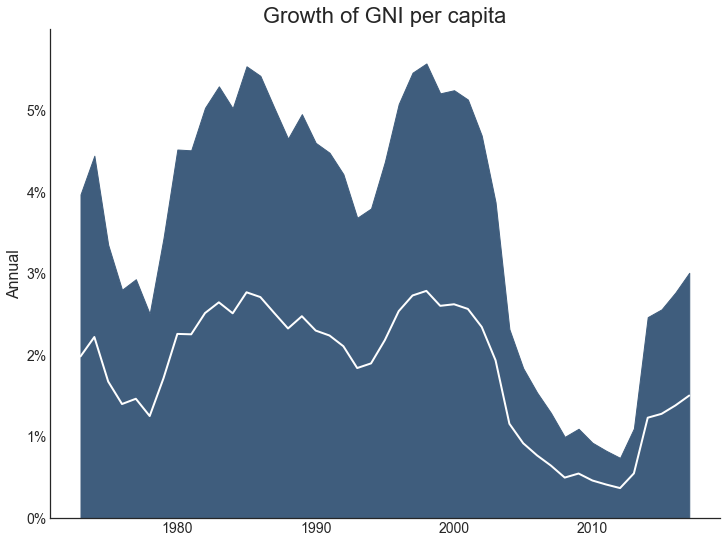

In [10]:
#https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(nominal,_Atlas_method)_per_capita
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

# This function takes an array of numbers and smoothes them out.
# Smoothing is useful for making plots a little easier to read.
def sliding_mean(data_array, window=5):
    data_array = np.array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)
        
    return np.array(new_list)
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(10, 7.5))
# Due to an agreement with the ChessGames.com admin, I cannot make the data
# for this plot publicly available. This function reads in and parses the
# chess data set into a tabulated pandas DataFrame.
chess_data = df[['Year', 'GDP per capita growth (annual %)']]
#print(sliding_mean(chess_data.groupby("Year")["GDP (current US$)"].mean().values, window=2))

#print(sliding_mean(chess_data.groupby("Year")["GDP (current US$)"].std().fillna(chess_data.groupby("Year")["GDP (current US$)"].mean()).values, window=2))
# These variables are where we put the years (x-axis), means (y-axis), and error bar values.
# We could just as easily replace the means with medians,
# and standard errors (SEMs) with standard deviations (STDs).
years = chess_data.groupby("Year")["GDP per capita growth (annual %)"].mean().keys()
mean_PlyCount = sliding_mean(chess_data.groupby("Year")["GDP per capita growth (annual %)"].mean().values,
                             window=5)
sem_PlyCount = sliding_mean(chess_data.groupby("Year")["GDP per capita growth (annual %)"].std().fillna(chess_data.groupby("Year")["GDP per capita growth (annual %)"].median()).values, window=5)

# You typically want your plot to be ~1.33x wider than tall.
# Common sizes: (10, 7.5) and (12, 9)
plt.figure(figsize=(12, 9))

# Remove the plot frame lines. They are unnecessary chartjunk.
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary chartjunk.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
plt.ylim(0, 6)

# Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
#plt.xticks(range(1, 2011, 20), fontsize=14)
#plt.yticks(range(65, 86, 5), fontsize=14)

# Along the same vein, make sure your axis labels are large
# enough to be easily read as well. Make them slightly larger
# than your axis tick labels so they stand out.
plt.ylabel("Annual", fontsize=16)
plt.yticks(range(0, 6, 1), [str(x) + "%" for x in range(0, 6, 1)], fontsize=14)  
plt.xticks(fontsize=14)  
# Use matplotlib's fill_between() call to create error bars.
# Use the dark blue "#3F5D7D" as a nice fill color.
plt.fill_between(years,mean_PlyCount - sem_PlyCount,
                 mean_PlyCount + sem_PlyCount, color="#3F5D7D")

# Plot the means as a white line in between the error bars. 
# White stands out best against the dark blue.
plt.plot(years, mean_PlyCount, color="white", lw=2)

# Make the title big enough so it spans the entire plot, but don't make it
# so big that it requires two lines to show.
plt.title("Growth of GNI per capita", fontsize=22)

# Always include your data source(s) and copyright notice! And for your
# data sources, tell your viewers exactly where the data came from,
# preferably with a direct link to the data. Just telling your viewers
# that you used data from the "U.S. Census Bureau" is completely useless:
# the U.S. Census Bureau provides all kinds of data, so how are your
# viewers supposed to know which data set you used?
#plt.xlabel("\nData source: www.ChessGames.com | " "Author: Randy Olson (randalolson.com / @randal_olson)", fontsize=10)

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.
plt.savefig("gni-per-capita.png", bbox_inches="tight");



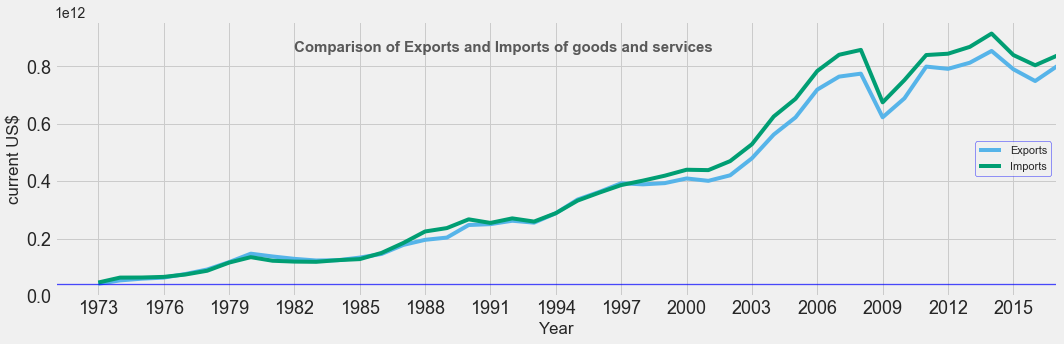

In [11]:
#https://www.dataquest.io/blog/making-538-plots/
import matplotlib.style as style
style.use('fivethirtyeight')
# Colorblind-friendly colors
colors = [[86/255,180/255,233/255],[0,158/255,115/255],[213/255,94/255,0], [0,114/255,178/255],   
          [0,0,0], [230/255,159/255,0]]
#dfru = df[['Year','Rural population (% of total population)','Urban population (% of total)']]
fte_graph = df.plot(x = 'Year', y = ['Exports of goods and services (current US$)','Imports of goods and services (current US$)'], figsize = (15,5), color = colors)
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Customizing the tick labels of the y-axis 
#fte_graph.set_ylim(0,100)
# Generate a bolded horizontal line at y = 0 
fte_graph.axhline(y = df['Exports of goods and services (current US$)'].min(), color = 'blue', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
fte_graph.set_xlim(left = 1971, right = 2017)
# Remove the label of the x-axis
#fte_graph.xaxis.label.set_visible(False)
# Adding a title and a subtitle
fte_graph.text(x = 1982, y = 850000000000.0, s = "Comparison of Exports and Imports of goods and services",
               fontsize = 15, weight = 'bold', alpha = .75)
# add cool legend
fte_graph.legend(['Exports','Imports'],loc='center right', fontsize=11, frameon=True).get_frame().set_edgecolor('blue') 
fte_graph.set_xlabel('Year')
fte_graph.set_ylabel('current US$')
fte_graph.set_xticks((df['Year'])[::3])

#fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{}'.format))

plt.tight_layout()
plt.savefig("exports-imports.png", bbox_inches="tight");

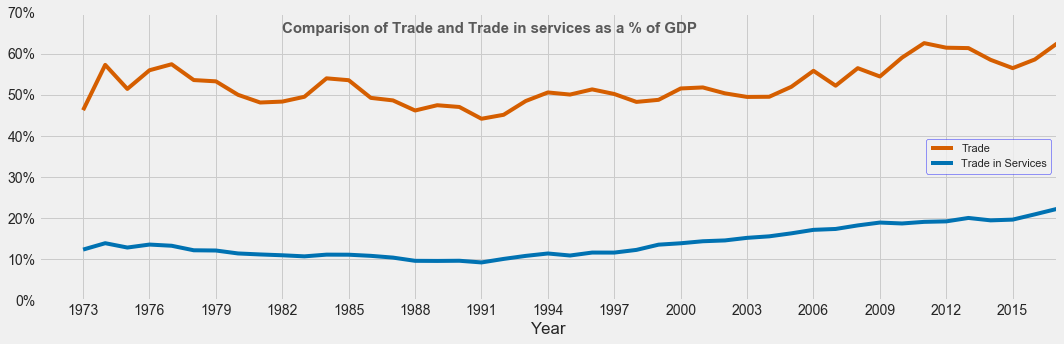

In [12]:
#https://www.dataquest.io/blog/making-538-plots/
import matplotlib.style as style
style.use('fivethirtyeight')
# Colorblind-friendly colors
colors = [[213/255,94/255,0], [0,114/255,178/255],   
          [0,0,0], [230/255,159/255,0],[86/255,180/255,233/255],[0,158/255,115/255]]
#dfru = df[['Year','Rural population (% of total population)','Urban population (% of total)']]
fte_graph = df.plot(x = 'Year', y = ['Trade (% of GDP)', 'Trade in services (% of GDP)'], figsize = (15,5), color = colors)
#fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Customizing the tick labels of the y-axis 
fte_graph.set_ylim(0,70)
# Generate a bolded horizontal line at y = 0 
fte_graph.axhline(y = df['Exports of goods and services (current US$)'].min(), color = 'blue', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
fte_graph.set_xlim(left = 1971, right = 2017)
# Remove the label of the x-axis
#fte_graph.xaxis.label.set_visible(False)
# Adding a title and a subtitle
fte_graph.text(x = 1982, y = 65.0, s = "Comparison of Trade and Trade in services as a % of GDP ",
                fontsize = 15, weight = 'bold', alpha = .75)
# add cool legend
fte_graph.legend(['Trade','Trade in Services'],loc='center right', fontsize=11, frameon=True).get_frame().set_edgecolor('blue') 
fte_graph.set_xlabel('Year')
#fte_graph.set_ylabel('GDP')
fte_graph.set_xticks((df['Year'])[::3])

fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.tight_layout()
plt.savefig("trade-trade_services.png", bbox_inches="tight");

In [13]:
'Computer, communications and other services (% of commercial service imports)','Insurance and financial services (% of commercial service imports)', 'Transport services (% of commercial service imports)','Travel services (% of commercial service imports)'

('Computer, communications and other services (% of commercial service imports)',
 'Insurance and financial services (% of commercial service imports)',
 'Transport services (% of commercial service imports)',
 'Travel services (% of commercial service imports)')

In [14]:
style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 '_classic_test']

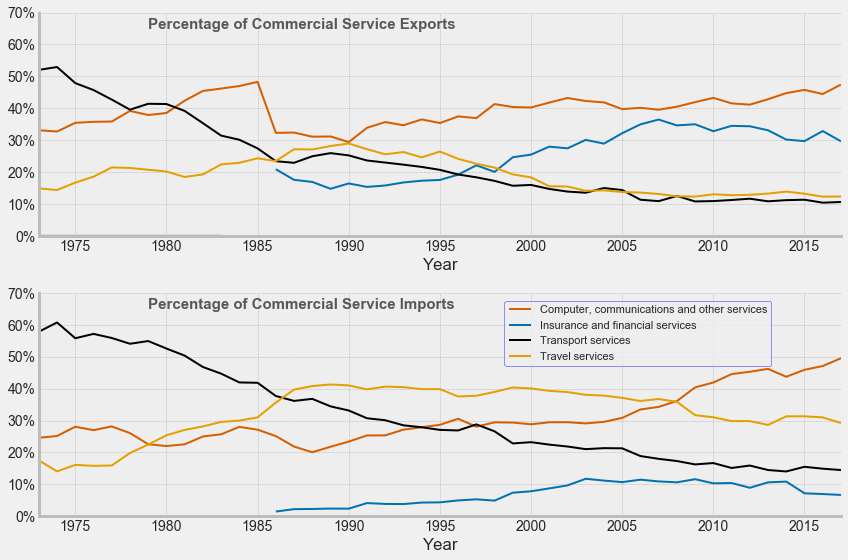

In [30]:
#https://www.dataquest.io/blog/making-538-plots/
import matplotlib.style as style
style.use('bmh')
# Colorblind-friendly colors
colors = [[213/255,94/255,0], [0,114/255,178/255],   
          [0,0,0], [230/255,159/255,0],[86/255,180/255,233/255],[0,158/255,115/255]]
#dfru = df[['Year','Rural population (% of total population)','Urban population (% of total)']]
f, (ax1, ax2) = plt.subplots(2,1, sharey =True)

fte_graph = df.plot(x = 'Year', y = ['Computer, communications and other services (% of commercial service exports)', 
       'Insurance and financial services (% of commercial service exports)', 
       'Transport services (% of commercial service exports)',
       'Travel services (% of commercial service exports)'], figsize = (12,8), color = colors, ax = ax1)
#fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Customizing the tick labels of the y-axis 
fte_graph.set_ylim(0,70)
# Generate a bolded horizontal line at y = 0 
#fte_graph.axhline(y = 0, color = 'blue', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
#fte_graph.set_xlim(left = 1971, right = 2017)
# Remove the label of the x-axis
#fte_graph.xaxis.label.set_visible(False)
# Adding a title and a subtitle
fte_graph.text(x = 1979, y = 65.0, s = "Percentage of Commercial Service Exports ",
                fontsize = 15, weight = 'bold', alpha = .75)
# add cool legend
fte_graph.legend([]) 
#fte_graph.set_xlabel('Year')
#fte_graph.set_ylabel('GDP')
#fte_graph.set_xticks((df['Year'])[::3])


fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
fte_graph.spines["top"].set_visible(False)  
fte_graph.spines["right"].set_visible(False) 

fte_graph_1 = df.plot(x = 'Year', y = ['Computer, communications and other services (% of commercial service imports)', 
       'Insurance and financial services (% of commercial service imports)', 
       'Transport services (% of commercial service imports)',
       'Travel services (% of commercial service imports)'], figsize = (12,8), color = colors, ax = ax2)
#fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Customizing the tick labels of the y-axis 
fte_graph_1.set_ylim(0,70)
# Generate a bolded horizontal line at y = 0 
#fte_graph.axhline(y = 0, color = 'blue', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
#fte_graph_1.set_xlim(left = 1971, right = 2017)
# Remove the label of the x-axis
#fte_graph.xaxis.label.set_visible(False)
# Adding a title and a subtitle
fte_graph_1.text(x = 1979, y = 65.0, s = "Percentage of Commercial Service Imports ",
                fontsize = 15, weight = 'bold', alpha = .75)
# add cool legend
fte_graph_1.legend(['Computer, communications and other services','Insurance and financial services','Transport services','Travel services'],
                   bbox_to_anchor=(.92, .99), fontsize=11, frameon=True).get_frame().set_edgecolor('blue') 
#fte_graph_1.set_xlabel('Year')
#fte_graph.set_ylabel('GDP')
#fte_graph_1.set_xticks((df['Year'])[::3])
 

fte_graph_1.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
fte_graph_1.spines["top"].set_visible(False)  
fte_graph_1.spines["right"].set_visible(False)
  
plt.tight_layout()
plt.savefig("commercial_services.png", bbox_inches="tight");

https://stackoverflow.com/questions/48225888/matplotlib-finance-candlestick-ohlc-plot-intraday-1min-bar-data-with-time-breaks

https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

https://realpython.com/python-histograms/

